In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fftshift, fft, fftfreq
from scipy.integrate import quad 

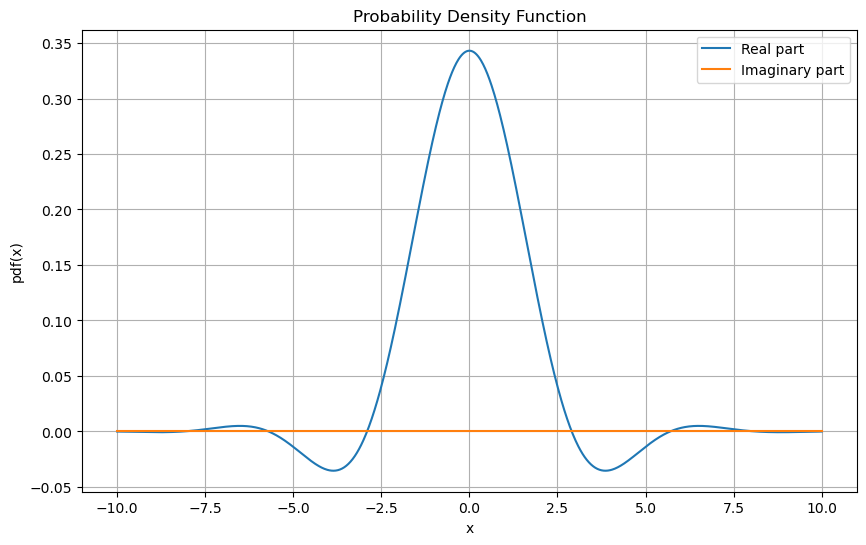

In [27]:
def chi(x):
    return np.exp(-x**4 / 2)

def pdf(x):
    integrand = lambda t: chi(t) * np.exp(-1j * t * x)
    real = quad(lambda t: np.real(integrand(t)), -np.inf, np.inf)[0] / (2 * np.pi)
    imag = quad(lambda t: np.imag(integrand(t)), -np.inf, np.inf)[0] / (2 * np.pi)
    return real + 1j*imag

def chi_prime(x):
    integrand = lambda t: pdf(t) * np.exp(1j * t * x)
    real = quad(lambda t: np.real(integrand(t)), -np.inf, np.inf)[0] / (2 * np.pi)
    imag = quad(lambda t: np.imag(integrand(t)), -np.inf, np.inf)[0] / (2 * np.pi)
    return real + 1j*imag

# Generate x values for plotting
x = np.linspace(-10, 10, 1000)

# Calculate pdf values
y = [pdf(xi) for xi in x]

# Plot the real and imaginary parts
plt.figure(figsize=(10, 6))
plt.plot(x, np.real(y), label='Real part')
plt.plot(x, np.imag(y), label='Imaginary part')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.title('Probability Density Function')
plt.show()


